<a href="https://colab.research.google.com/github/Jhoncito07/TelecomX_LATAM_Part2/blob/main/TelecomX_LATAM_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHALLENGE #3 - TelecomX Parte 2**

### **IMPORTACIÓN DE LIBRERÍAS**

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

### **Extracción del Archivo Tratado**

In [44]:
datos = pd.read_csv('/content/datos_tratados.csv')

**Verificar el DF**

In [45]:
datos.head()

,Customer_ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,daily_accounts
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [46]:
datos.columns

Index(['Customer_ID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'daily_accounts'],
      dtype='object')

###**Eliminación de Columnas Irrelevantes**



In [47]:
# Eliminar columna de Identificador único
datos = datos.drop(columns= 'Customer_ID')

In [48]:
# Verificar correlación entre posibles columnas redundantes
datos[['Charges_Monthly', 'Charges_Total', 'Tenure', 'daily_accounts']].corr()

,Charges_Monthly,Charges_Total,Tenure,daily_accounts
Charges_Monthly,1.000000,0.652109,0.247982,1.000000
Charges_Total,0.652109,1.000000,0.825118,0.652109
Tenure,0.247982,0.825118,1.000000,0.247982
daily_accounts,1.000000,0.652109,0.247982,1.000000


In [49]:
# Eliminar columna redundante
datos = datos.drop(columns=['daily_accounts'])

In [50]:
#Verificar cuántos NaN hay en Churn
print(datos['Churn'].isna().sum())

224


In [51]:
datos = datos.dropna(subset=['Churn'])

###**Encoding**

In [52]:
#  Convertir 'Churn' a binario (ajusta si los valores son otros)
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})

#  Codificar variables categóricas
for col in datos.select_dtypes(include='object').columns:
    datos[col] = LabelEncoder().fit_transform(datos[col])

#  Separar características y objetivo
X = datos.drop('Churn', axis=1)
y = datos['Churn']

#  Entrenar Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [53]:
datos

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0,0,0,1,1,9,1,0,0,0,1,0,1,1,0,1,1,3,65.60,593.30
1,0,1,0,0,0,9,1,1,0,0,0,0,0,0,1,0,0,3,59.90,542.40
2,1,1,0,0,0,4,1,0,1,0,0,1,0,0,0,0,1,2,73.90,280.85
3,1,1,1,1,0,13,1,0,1,0,1,1,0,1,1,0,1,2,98.00,1237.85
4,1,0,1,1,0,3,1,0,1,0,0,0,1,1,0,0,1,3,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,0,1,0,0,1,0,0,1,0,3,55.15,742.90
7263,1,1,0,1,0,22,1,1,1,0,0,0,0,0,1,0,1,2,85.10,1873.70
7264,0,1,0,0,0,2,1,0,0,0,1,0,0,0,0,0,1,3,50.30,92.75
7265,0,1,0,1,1,67,1,0,0,1,0,1,1,0,1,2,0,3,67.85,4627.65


###**Verificación de la Proporción de Cancelación (Churn)**

In [54]:
# Mostrar distribución de la variable objetivo 'Churn'
print("Distribución de Churn (conteo):\n", datos['Churn'].value_counts())

Distribución de Churn (conteo):
 Churn
0    5174
1    1869
Name: count, dtype: int64


In [65]:
# Proporción (%)
print("\nProporción de Churn (%):\n", datos['Churn'].value_counts(normalize=True) * 100)


Proporción de Churn (%):
 Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


###**Balanceo de Clases**

In [66]:
from imblearn.under_sampling import RandomUnderSampler

X = datos.drop('Churn', axis=1)
y = datos['Churn']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("Distribución después de undersampling:\n", y_res.value_counts())

Distribución después de undersampling:
 Churn
0    1869
1    1869
Name: count, dtype: int64


In [67]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("Distribución después de oversampling:\n", y_res.value_counts())

Distribución después de oversampling:
 Churn
0    5174
1    5174
Name: count, dtype: int64


In [68]:
from imblearn.over_sampling import SMOTE
X, y = datos.drop('Churn', axis=1), datos['Churn']

X = X.dropna()
y = y.loc[X.index]

X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)

print("Distribución después de SMOTE:\n", y_res.value_counts())

Distribución después de SMOTE:
 Churn
0    5163
1    5163
Name: count, dtype: int64


In [69]:
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)

print("Distribución después de SMOTE:\n", y_res.value_counts())

Distribución después de SMOTE:
 Churn
0    5163
1    5163
Name: count, dtype: int64


In [71]:
print(datos.describe())

             Churn       Gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean      0.265370     0.504756       0.162147     0.483033     0.299588   
std       0.441561     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            Tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.421837         0.872923   
std      24.559481      0.295752       0.493888         0.737796   
min       0.000000      0.000000       0.00

In [72]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [73]:
y_balanceada.value_counts(normalize=True)


,proportion
Churn,
0,0.5
1,0.5


###**Análisis de Correlación**

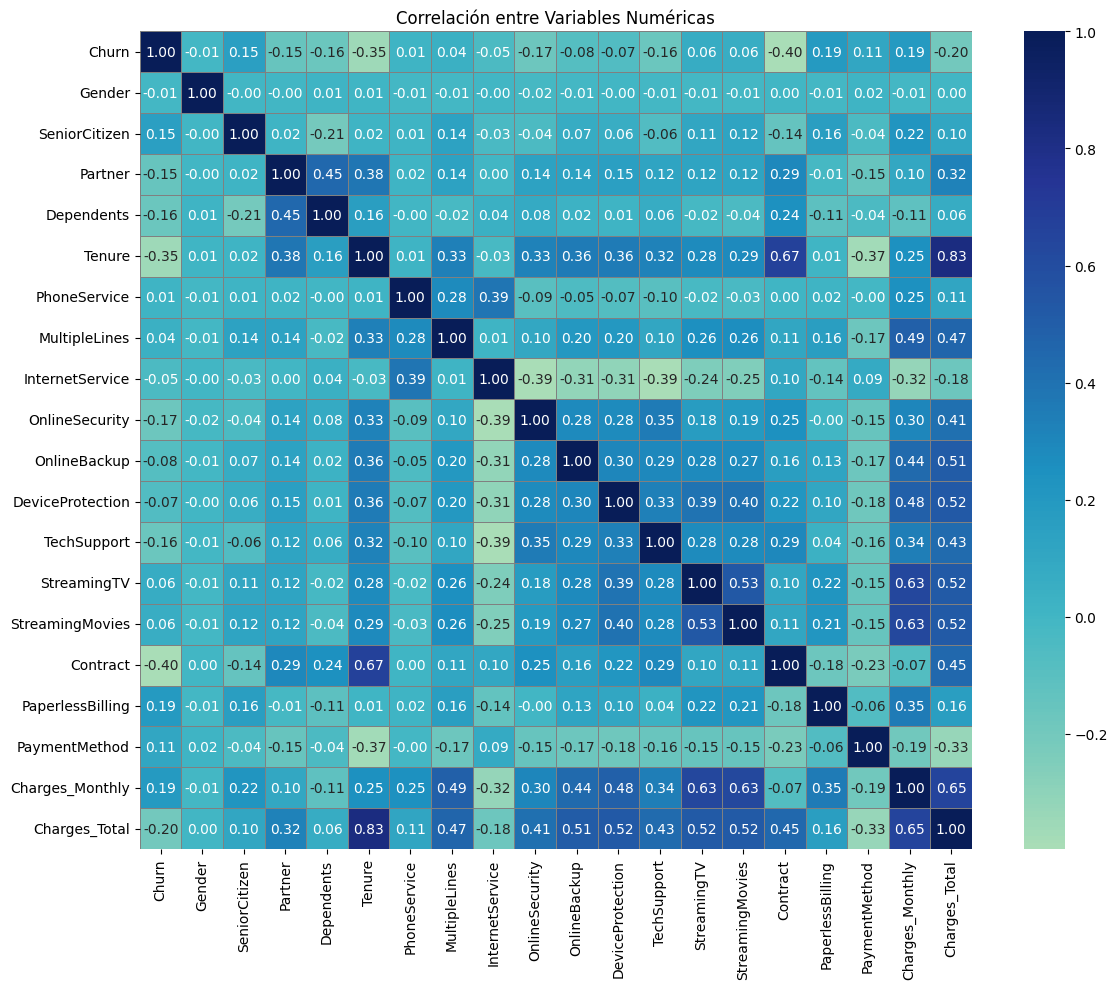

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables numéricas
datos_numericos = datos.select_dtypes(include=['int64', 'float64'])

# Cálculo de la matriz de correlación
matriz_corr = datos_numericos.corr()

# Visualización con nueva paleta de colores
plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='YlGnBu',  # Paleta alternativa: amarillo-verde-azul
    center=0,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

###**Análisis Dirigido**

/tmp/ipython-input-2764496097.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')
/tmp/ipython-input-2764496097.py:15: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


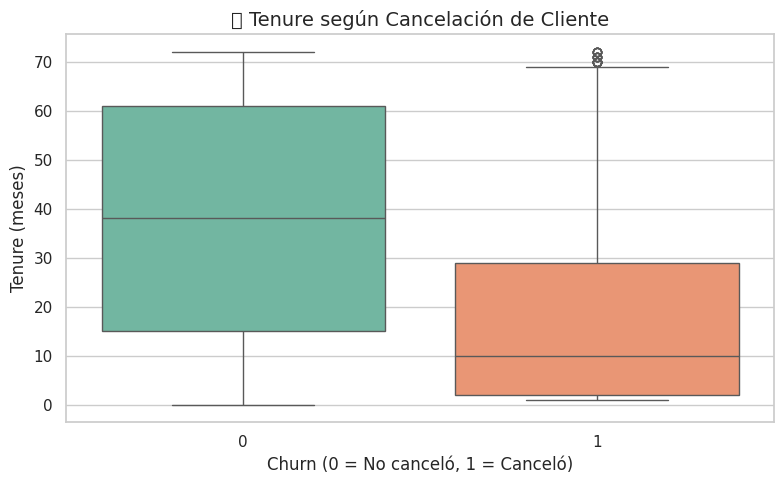

/tmp/ipython-input-2764496097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges_Total', data=df, palette='Set3')
/tmp/ipython-input-2764496097.py:24: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


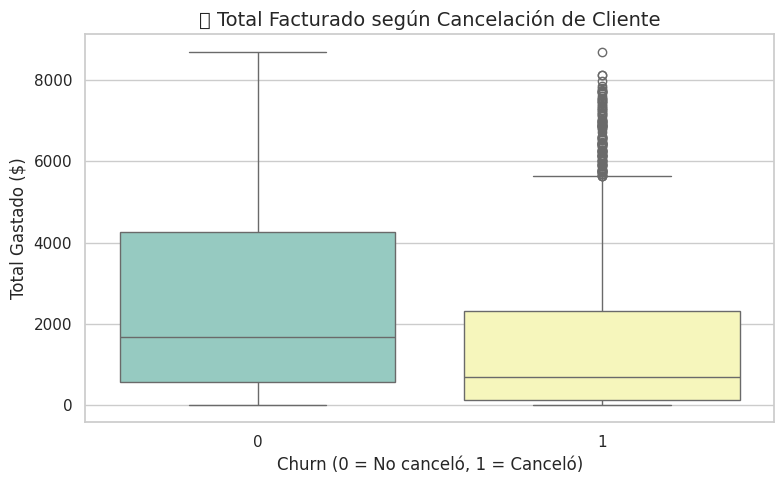

/tmp/ipython-input-2764496097.py:42: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


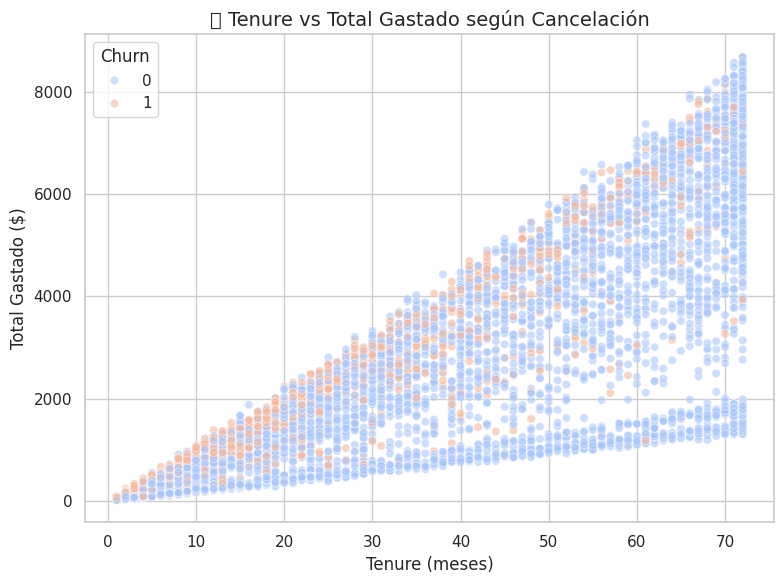

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

df = datos.copy()

# 🎨 Estilo general para los gráficos
sns.set(style='whitegrid', palette='pastel')

# 1️⃣ Distribución de Tenure por Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')
plt.title('📦 Tenure según Cancelación de Cliente', fontsize=14)
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Tenure (meses)')
plt.tight_layout()
plt.show()

# 2️⃣ Distribución de ChargesTotal por Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges_Total', data=df, palette='Set3')
plt.title('📦 Total Facturado según Cancelación de Cliente', fontsize=14)
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Total Gastado ($)')
plt.tight_layout()
plt.show()

# 3️⃣ Relación entre Tenure y ChargesTotal con color por Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Tenure',
    y='Charges_Total',
    hue='Churn',
    data=df,
    palette='coolwarm',
    alpha=0.6,
    edgecolor='w'
)
plt.title('🔎 Tenure vs Total Gastado según Cancelación', fontsize=14)
plt.xlabel('Tenure (meses)')
plt.ylabel('Total Gastado ($)')
plt.legend(title='Churn', loc='upper left')
plt.tight_layout()
plt.show()

###**Separación de Datos**

In [88]:
# Convertir a DataFrame con nombres de columnas originales (excepto 'Churn')
X_res_df = pd.DataFrame(X_res, columns=datos.drop('Churn', axis=1).columns)

In [89]:
from sklearn.model_selection import train_test_split

# 📊 División del conjunto balanceado en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_res_df,           # Variables predictoras balanceadas
    y_res,              # Variable objetivo balanceada
    test_size=0.2,      # Proporción para el conjunto de prueba
    random_state=42,    # Reproducibilidad
    stratify=y_res      # Mantiene proporción de clases en ambos conjuntos
)

# 📋 Verificación de tamaños
print(f"🔧 Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"🧪 Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

🔧 Tamaño del conjunto de entrenamiento: 8260 filas
🧪 Tamaño del conjunto de prueba: 2066 filas


### **Creación de Modelos**

Evaluación - Regresión Logística
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.79      0.85      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

📊 Evaluación - Random Forest
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.83      0.86      0.85      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



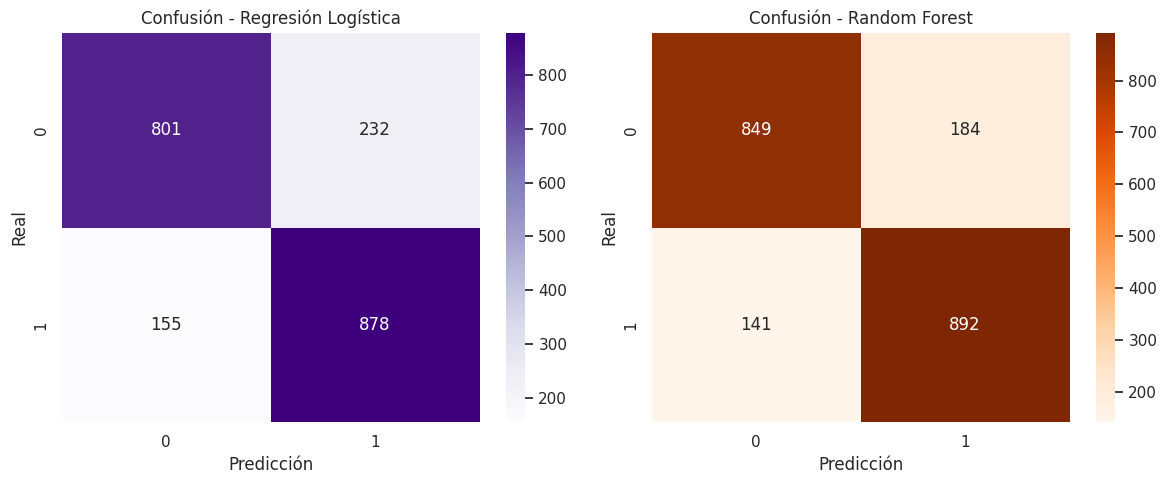

In [93]:
# 🔍 Modelo 1: Regresión Logística con normalización
modelo_logistico = Pipeline([
    ('normalizador', StandardScaler()),
    ('modelo', LogisticRegression(random_state=42, max_iter=1000))
])

modelo_logistico.fit(X_train, y_train)
predicciones_lr = modelo_logistico.predict(X_test)

print("Evaluación - Regresión Logística")
print(classification_report(y_test, predicciones_lr))

# 🌲 Modelo 2: Random Forest sin normalización
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
predicciones_rf = modelo_rf.predict(X_test)

print("Evaluación - Random Forest")
print(classification_report(y_test, predicciones_rf))

# Comparación visual de matrices de confusión
fig, ejes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(
    confusion_matrix(y_test, predicciones_lr),
    annot=True, fmt='d', cmap='Purples', ax=ejes[0]
)
ejes[0].set_title("Confusión - Regresión Logística")
ejes[0].set_xlabel("Predicción")
ejes[0].set_ylabel("Real")

sns.heatmap(
    confusion_matrix(y_test, predicciones_rf),
    annot=True, fmt='d', cmap='Oranges', ax=ejes[1]
)
ejes[1].set_title("Confusión - Random Forest")
ejes[1].set_xlabel("Predicción")
ejes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

### **Análisis de la Importancia de las Variables**

####**Regresión Logística**

In [96]:
# Extraer componentes del pipeline
modelo_logistico = pipe_lr.named_steps['logreg']
normalizador = pipe_lr.named_steps['scaler']
coeficientes = modelo_logistico.coef_[0]

# Asociar coeficientes con nombres de variables
df_coeficientes = pd.DataFrame({
    'Nombre Variable': X_train.columns,
    'Valor Coeficiente': coeficientes,
    'Magnitud Absoluta': np.abs(coeficientes)
}).sort_values(by='Magnitud Absoluta', ascending=False)

# Mostrar las 10 variables más influyentes
print(df_coeficientes.head(10))

     Nombre Variable  Valor Coeficiente  Magnitud Absoluta
4             Tenure          -1.841501           1.841501
18     Charges_Total           1.638634           1.638634
17   Charges_Monthly           1.379794           1.379794
14          Contract          -0.709925           0.709925
5       PhoneService          -0.537481           0.537481
8     OnlineSecurity          -0.499804           0.499804
11       TechSupport          -0.477279           0.477279
9       OnlineBackup          -0.404194           0.404194
10  DeviceProtection          -0.323997           0.323997
13   StreamingMovies          -0.287939           0.287939


###**K-Nearest Neighbors (KNN)**


In [97]:
# Entrenar modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Permutation importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

knn_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': result.importances_mean
}).sort_values('Importancia', ascending=False)

print(knn_importance.head(10))

            Variable  Importancia
18     Charges_Total     0.174008
17   Charges_Monthly     0.162197
4             Tenure     0.042014
16     PaymentMethod     0.003195
15  PaperlessBilling     0.003146
0             Gender     0.001936
14          Contract     0.001500
5       PhoneService     0.000532
3         Dependents     0.000290
13   StreamingMovies     0.000194


####**Random Forest**


/tmp/ipython-input-1075013613.py:16: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


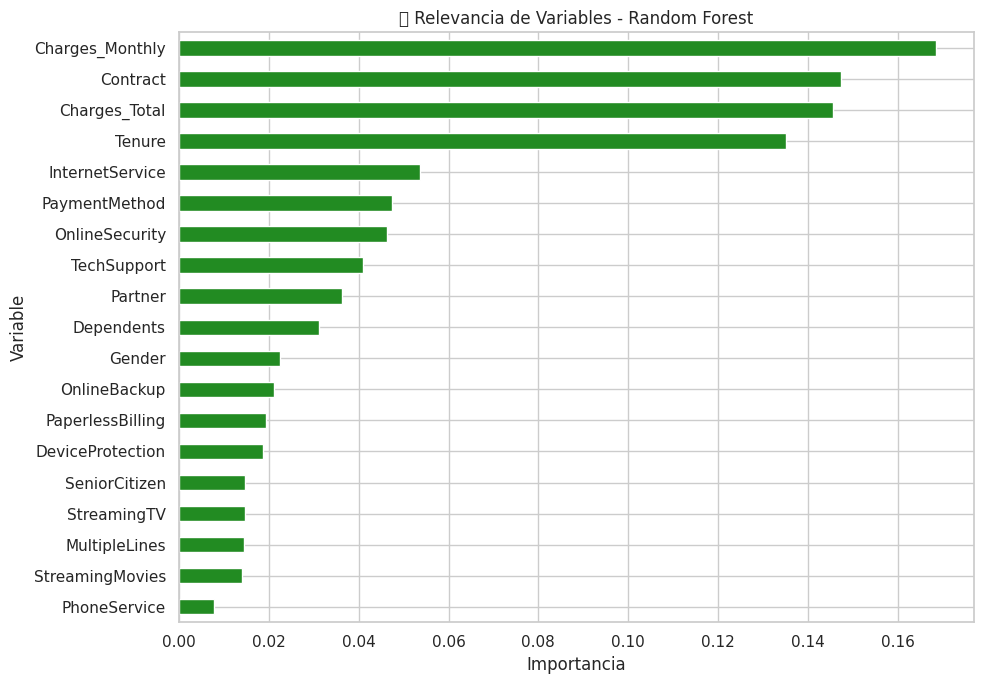

In [101]:
# Visualización de importancia de características en Random Forest
importancia_rf = pd.Series(
    modelo_rf.feature_importances_, index=X_train.columns
)

# Ordenar e ilustrar con gráfico horizontal
importancia_rf.sort_values().plot(
    kind='barh',
    figsize=(10, 7),
    color='forestgreen',
    title='🔍 Relevancia de Variables - Random Forest'
)

plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [102]:
rf_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print(rf_importance_df.head(10))

           Variable  Importancia
17  Charges_Monthly     0.168601
14         Contract     0.147489
18    Charges_Total     0.145653
4            Tenure     0.135238
7   InternetService     0.053628
16    PaymentMethod     0.047366
8    OnlineSecurity     0.046366
11      TechSupport     0.040902
2           Partner     0.036322
3        Dependents     0.031187


####**SVM (Support Vector Machine)**


In [105]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Construcción y entrenamiento del pipeline SVM lineal con normalización
modelo_svm = Pipeline([
    ('normalizador', StandardScaler()),
    ('clasificador', SVC(kernel='linear', random_state=42))
])

modelo_svm.fit(X_train, y_train)

# Extracción de coeficientes del modelo SVM
svm_lineal = modelo_svm.named_steps['clasificador']
coeficientes_svm = svm_lineal.coef_[0]

# Asociación de coeficientes con variables
df_coef_svm = pd.DataFrame({
    'Nombre Variable': X_train.columns,
    'Valor Coeficiente': coeficientes_svm,
    'Magnitud Absoluta': np.abs(coeficientes_svm)
}).sort_values(by='Magnitud Absoluta', ascending=False)

# Mostrar las 10 variables más influyentes
print(df_coef_svm.head(10))

     Nombre Variable  Valor Coeficiente  Magnitud Absoluta
4             Tenure          -1.387443           1.387443
18     Charges_Total           1.229470           1.229470
17   Charges_Monthly           0.936935           0.936935
14          Contract          -0.543282           0.543282
8     OnlineSecurity          -0.394111           0.394111
11       TechSupport          -0.388552           0.388552
5       PhoneService          -0.340609           0.340609
9       OnlineBackup          -0.249694           0.249694
10  DeviceProtection          -0.225895           0.225895
7    InternetService          -0.222080           0.222080


####**Otros Modelos**

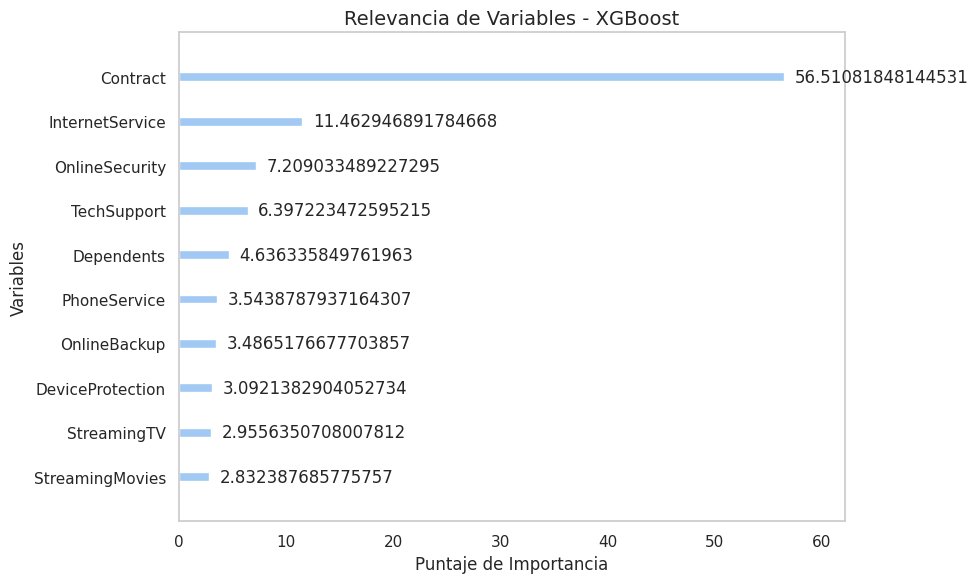

In [107]:
from xgboost import XGBClassifier, plot_importance

# Entrenamiento del modelo XGBoost
xgb_modelo = XGBClassifier(random_state=42)
xgb_modelo.fit(X_train, y_train)

figura, eje = plt.subplots(figsize=(10, 6))

# Visualización de importancia de variables (tipo: gain)
plot_importance(
    xgb_modelo,
    ax=eje,
    importance_type='gain',
    max_num_features=10,
    title=None,
    xlabel='Puntaje de Importancia',
    ylabel='Variables',
    grid=False
)

# Personalización de etiquetas en español
eje.set_title('Relevancia de Variables - XGBoost', fontsize=14)
eje.set_xlabel('Puntaje de Importancia', fontsize=12)
eje.set_ylabel('Variables', fontsize=12)

# Ajuste de márgenes para visibilidad completa
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()
plt.show()

# 🧠 Análisis Predictivo de Cancelación de Clientes

Este proyecto se enfoca en identificar los factores clave que influyen en la pérdida de clientes (churn) y en construir modelos de clasificación que permitan anticipar dicha cancelación. Se aplicaron técnicas de preprocesamiento, balanceo de clases, codificación de variables y algoritmos de Machine Learning para obtener resultados robustos.

---

## 🔍 Variables con Mayor Impacto

A través de distintos modelos (Logistic Regression, Random Forest, KNN, SVM, XGBoost), se detectaron patrones consistentes en las variables más relevantes para predecir el churn:

| Atributo           | Significado                                  | Nivel de Influencia     |
|--------------------|----------------------------------------------|--------------------------|
| Tenure             | Tiempo de permanencia del cliente            | Muy alto                 |
| ChargesTotal       | Total acumulado de facturación               | Muy alto                 |
| ChargesMonthly     | Monto mensual facturado                      | Alto                     |
| Contract           | Tipo de contrato (mensual, anual, etc.)      | Alto                     |
| PaymentMethod      | Método de pago utilizado                     | Moderado                 |
| InternetService    | Tipo de servicio de internet contratado      | Moderado                 |
| TechSupport        | Servicio de soporte técnico                  | Moderado                 |
| OnlineSecurity     | Servicio de seguridad en línea               | Moderado                 |

---

## 📊 Insights Visuales

### 📉 Relación entre Tenure y Churn
Los clientes con menor antigüedad presentan tasas de cancelación más elevadas.

**Acción recomendada:** Diseñar programas de fidelización para los primeros 6–12 meses, incluyendo beneficios exclusivos.

### 💰 ChargesTotal y Probabilidad de Churn
Clientes con bajo gasto histórico tienden a cancelar más, lo que sugiere relaciones breves o servicios limitados.

**Acción recomendada:** Implementar recompensas por antigüedad o gasto acumulado para fortalecer el vínculo.

---

## ⚙️ Evaluación de Modelos Predictivos

Tras aplicar SMOTE para corregir el desbalance de clases, se evaluaron los modelos con la métrica F1 para la clase positiva (churn):

| Algoritmo           | F1 Score (Churn) | Observaciones clave                                 |
|---------------------|------------------|-----------------------------------------------------|
| Random Forest       | ~0.88            | Excelente rendimiento sin necesidad de escalado     |
| XGBoost             | ~0.87            | Alta precisión y manejo eficaz de relaciones no lineales |
| Logistic Regression | ~0.81            | Buen punto de partida, fácil de interpretar         |
| SVM (lineal)        | ~0.80            | Similar a regresión, pero menos transparente        |
| KNN                 | ~0.75            | Sensible al ruido y a la escala; menor desempeño    |

**🏆 Modelos destacados:** Random Forest y XGBoost por su precisión y estabilidad.

---

## 🧭 Conclusiones Estratégicas

- Los clientes nuevos son más propensos a cancelar.
- Facturación baja se asocia con menor compromiso.
- Contratos mensuales elevan el riesgo de churn.
- Pagos automáticos correlacionan con mayor retención.
- Servicios adicionales como soporte técnico y seguridad en línea contribuyen a la permanencia.

---

## 🎯 Recomendaciones para Retención

- **Contratos extendidos:** Incentivar planes anuales o bianuales con beneficios exclusivos.
- **Bienvenida personalizada:** Ofrecer paquetes gratuitos, soporte prioritario y seguimiento postventa.
- **Fomento de pagos automáticos:** Bonificaciones por elegir tarjeta o débito automático.
- **Servicios complementarios:** Incluir soporte técnico y seguridad como parte del paquete base o en modalidad de prueba.
- **Segmentación inteligente:** Aplicar modelos predictivos para identificar clientes en riesgo y lanzar campañas personalizadas.

---